In [3]:
1+2

3

In [4]:
pip intall tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "intall" - maybe you meant "install"



In [5]:
pip install tensorflow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow import keras
import seaborn as sns

In [7]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter

# Define dataset path
dataset_path = r'E:\waste-recommender-system\garbage_classification'  # Change this to your dataset path
class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print(f"Classes found: {class_names}")


Classes found: ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


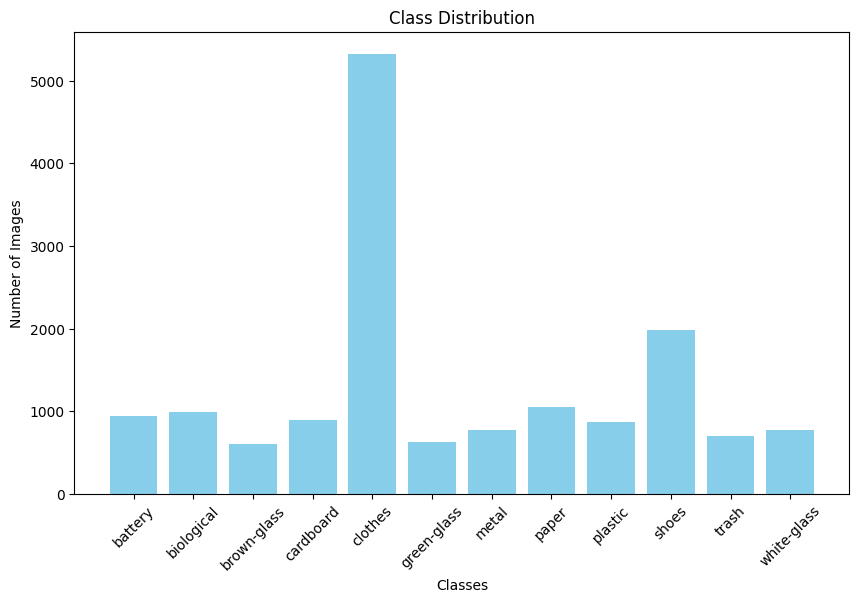

In [8]:
# Analyze class distribution
class_counts = {}
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    class_counts[class_name] = len(os.listdir(class_path))

# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()


In [9]:
def load_images_for_pca(dataset_path, class_names, max_images=5000):
    images = []
    total_images = []
    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        class_images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
        total_images.extend(class_images)
    
    # Subsample randomly if total images exceed max_images
    sampled_images = random.sample(total_images, min(max_images, len(total_images)))

    for img_path in sampled_images:
        try:
            img = Image.open(img_path).convert('RGB').resize((64, 64))  # Ensure RGB format
            images.append(np.array(img).flatten())  # Flatten to 1D array
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    return np.array(images)

# Load a subset of images
images = load_images_for_pca(dataset_path, class_names, max_images=5000)
print(f"Loaded {images.shape[0]} images for PCA.")


Loaded 5000 images for PCA.


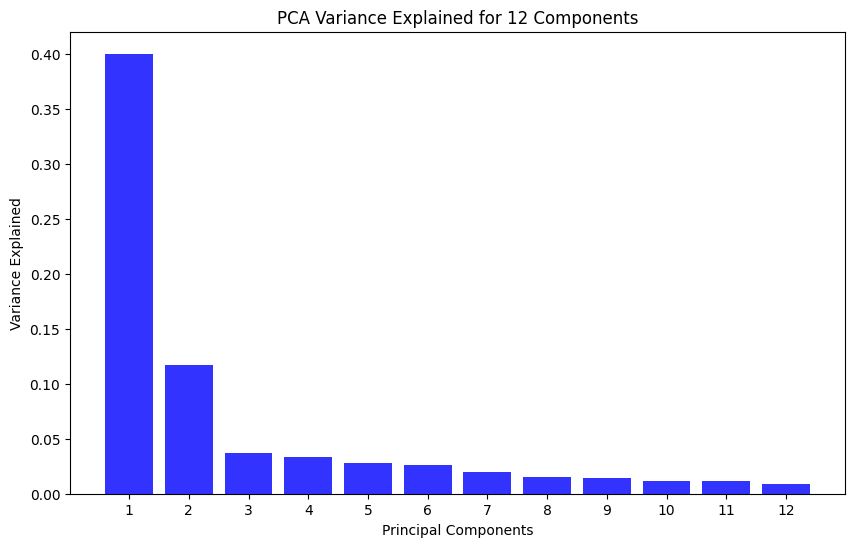

In [10]:
# Apply PCA with 12 components
pca = PCA(n_components=12)
features = pca.fit_transform(images)

# Visualize variance explained by each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), pca.explained_variance_ratio_, alpha=0.8, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA Variance Explained for 12 Components')
plt.xticks(range(1, 13))
plt.show()


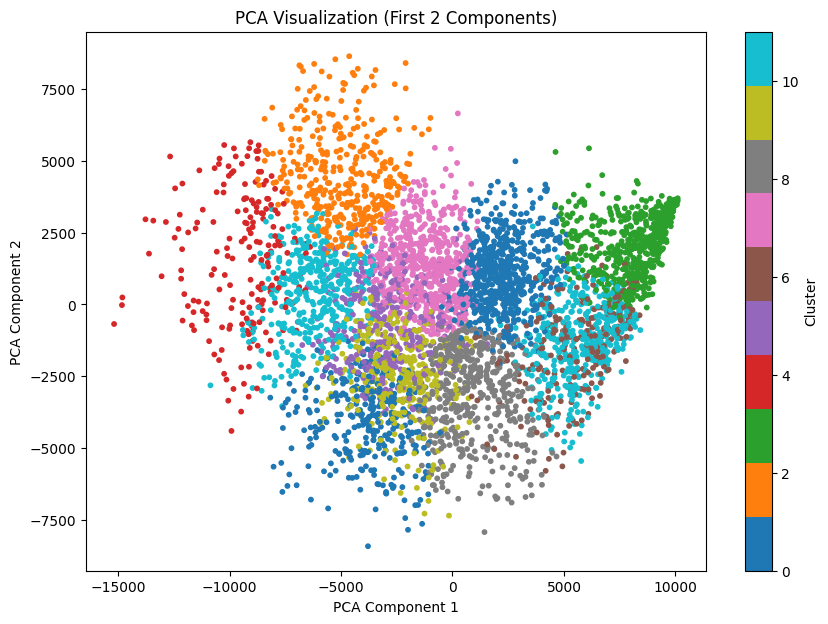

In [11]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=12, random_state=42)  # 12 clusters for 12 classes
clusters = kmeans.fit_predict(features)

# Visualize the first 2 PCA components with clusters
plt.figure(figsize=(10, 7))
plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='tab10', s=10)
plt.colorbar(label='Cluster')
plt.title('PCA Visualization (First 2 Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [12]:
# Save PCA features and cluster labels for future analysis
np.save('pca_features.npy', features)
np.save('kmeans_clusters.npy', clusters)

# Inspect the distribution of samples across clusters
cluster_counts = Counter(clusters)
print(f"Cluster Distribution: {cluster_counts}")


Cluster Distribution: Counter({1: 632, 7: 619, 3: 574, 8: 480, 10: 413, 11: 401, 2: 392, 9: 365, 5: 364, 0: 325, 6: 242, 4: 193})


In [13]:
import os
import shutil
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# Define paths
dataset_path = r'E:\waste-recommender-system\garbage_classification'
train_dir = r'E:\waste-recommender-system\train'
val_dir = r'E:\waste-recommender-system\val'

# Create directories for train and validation
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Get class names
class_names = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]

# Function to copy files
def copy_files(image_list, src_dir, dst_dir):
    for image in tqdm(image_list, desc=f'Copying to {dst_dir}'):
        src = os.path.join(src_dir, image)
        dst = os.path.join(dst_dir, image)
        try:
            shutil.copy(src, dst)
        except Exception as e:
            print(f"Error copying {src} to {dst}: {e}")

# Split dataset into train and validation
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        # Create directories for each class in train and validation
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

        # Filter only image files
        all_images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

        # Split images into train and validation
        train_images, val_images = train_test_split(all_images, test_size=0.2, random_state=42)

        # Copy files to respective directories
        copy_files(train_images, class_path, train_class_dir)
        copy_files(val_images, class_path, val_class_dir)

# Summary
num_classes = len(class_names)
print("\nDataset split complete.")
print(f"Number of classes: {num_classes}")
for class_name in class_names:
    train_count = len(os.listdir(os.path.join(train_dir, class_name)))
    val_count = len(os.listdir(os.path.join(val_dir, class_name)))
    print(f"Class '{class_name}': {train_count} training images, {val_count} validation images.")



FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\sahiv\\Downloads\\archive\\garbage_classification'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Data Generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Normalize pixel values to [0, 1]
    rotation_range=30,              # Random rotations
    width_shift_range=0.2,          # Random width shifts
    height_shift_range=0.2,         # Random height shifts
    shear_range=0.2,                # Shear transformations
    zoom_range=0.2,                 # Random zooms
    horizontal_flip=True,           # Random horizontal flips
    fill_mode='nearest'             # Fill pixels during transformation
)

val_datagen = ImageDataGenerator(
    rescale=1./255                  # Normalize pixel values for validation
)

# Create train and validation data generators with resized images (256x256)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),         # Resize images to 256x256
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),         # Resize images to 256x256
    batch_size=32,
    class_mode='categorical'
)


Found 12409 images belonging to 12 classes.
Found 3106 images belonging to 12 classes.


In [ ]:
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the model architecture
resnet_model = Sequential()


pretrained_model = ResNet50(
    include_top=False,
    input_shape=(256, 256, 3),       # Input shape is (256, 256, 3)
    pooling='avg',                   
    weights='imagenet'               # Load pre-trained weights from ImageNet
)

# Freeze all layers in the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained model and custom layers
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())                      # Flatten the output from ResNet50
resnet_model.add(Dense(512, activation='relu'))  # Fully connected layer
resnet_model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate
    loss='categorical_crossentropy',       # Suitable loss function for multi-class classification
    metrics=['accuracy']                  # Monitor accuracy during training
)


In [ ]:
# Train the model
epochs = 15
history = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


c:\Users\sahiv\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
110/388 ━━━━━━━━━━━━━━━━━━━━ 24:39 5s/step - accuracy: 0.3217 - loss: 2.2451

In [ ]:
epochs = 15
history = resnet_model.fit(
    train_generator,               # Use the data generator for training
    validation_data=val_generator, # Use the data generator for validation
    epochs=epochs                  # Number of epochs
)


Epoch 1/15


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "resnet50" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(None, 128, 128, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')
00

97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 425ms/step - accuracy: 0.7068 - loss: 0.9267
Validation Loss: 0.923806369304657
Validation Accuracy: 0.7025806307792664


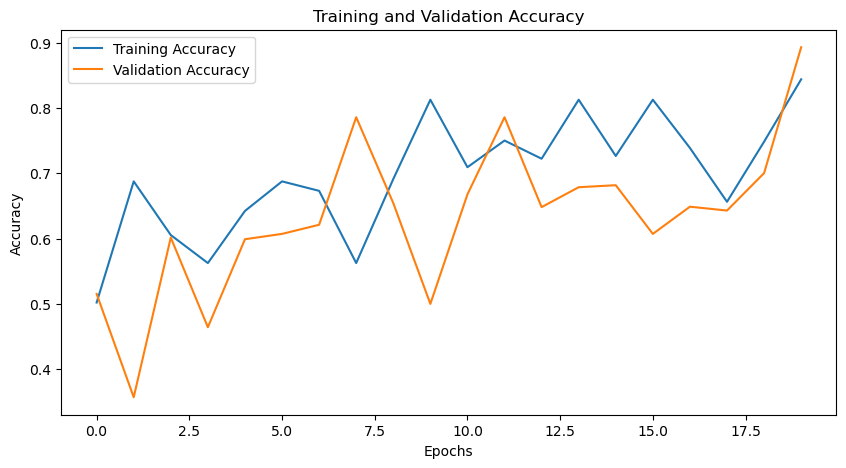

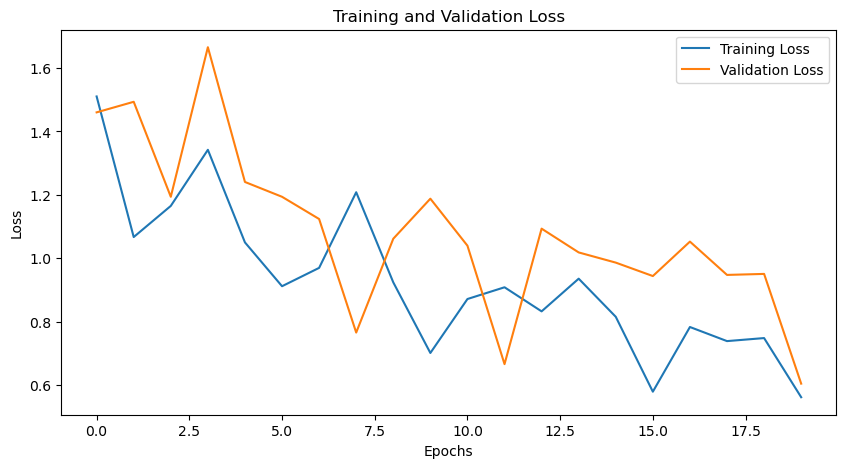

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Save the trained model
model.save('waste_classification_cnn2.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


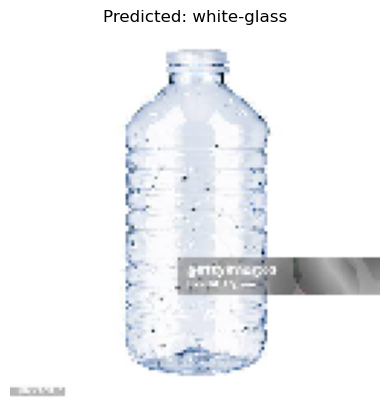

Predicted Class: white-glass


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the image you want to predict
image_path = r'C:\Users\sahiv\Downloads\gettyimages-182917334-612x612.jpg'  # Update this to your image path

# Load the image and resize it to match the input shape of the model (128x128 in this case)
img = image.load_img(image_path, target_size=(128, 128))

# Convert the image to a numpy array and normalize the pixel values (rescale as done in training)
img_array = image.img_to_array(img) / 255.0  # Rescaling to [0, 1]

# Expand the dimensions of the image array to match the input shape (batch size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)  # Shape will be (1, 128, 128, 3)

# Make a prediction using the trained model
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

# Get the class label (class_names should be the list of class names you have in the dataset)
class_names = train_generator.class_indices  # This gives the class indices
class_names = {v: k for k, v in class_names.items()}  # Reverse the dictionary

# Display the image and the prediction
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(f'Predicted: {class_names[predicted_class[0]]}')
plt.show()

# Output the predicted class label
print(f'Predicted Class: {class_names[predicted_class[0]]}')
